In [1]:
import os
import sys

import joblib
from tensorflow.keras import callbacks
import matplotlib.pyplot as pyplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy
import pandas
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import seaborn
from keras.utils import to_categorical

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import (
    GENRES,
    MOUNTED_DATASET_PATH,
    normalization_pipeline,
    set_shape_create_cnn_model
)

In [2]:
# load dataset
features = pandas.read_csv(MOUNTED_DATASET_PATH + '/data/cleaned_features_1.csv', index_col=0)
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
0,-0.236240,-0.012063,-0.027807,-0.051443,-0.082820,-0.237137,-0.011746,-0.027222,-0.051066,-0.082349,...,48729.0,24515.0,1367.0,236539.0,100477.0,48721.0,24523.0,10601.0,5868.0,2136.0
1,-0.733787,-0.017003,-0.045150,-0.053358,-0.045559,-0.728479,-0.016115,-0.044458,-0.053728,-0.045010,...,40467.0,21751.0,4280.0,232788.0,104560.0,40835.0,21922.0,11688.0,5678.0,4187.0
2,-0.206548,-0.001990,-0.004977,-0.010344,-0.032882,-0.206663,-0.001933,-0.004869,-0.009837,-0.031671,...,51110.0,28460.0,3429.0,238953.0,98627.0,50426.0,28197.0,12380.0,5750.0,2853.0
3,-0.505051,-0.017088,-0.050502,-0.085439,-0.155965,-0.503971,-0.016430,-0.050478,-0.080363,-0.153229,...,46009.0,24784.0,4084.0,239878.0,106315.0,46383.0,25001.0,10550.0,6405.0,3401.0
4,-0.265025,-0.007068,-0.017015,-0.033292,-0.048008,-0.263057,-0.006823,-0.016241,-0.032975,-0.046946,...,50126.0,21473.0,3355.0,235508.0,96446.0,50054.0,21542.0,11100.0,6028.0,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,-0.104572,-0.000267,-0.001287,-0.004655,-0.018606,-0.104197,-0.000241,-0.001230,-0.004309,-0.018012,...,111718.0,57071.0,5266.0,478728.0,194404.0,110085.0,56729.0,26120.0,10705.0,4714.0
3333,-0.064313,-0.000214,-0.000820,-0.004044,-0.013585,-0.064493,-0.000202,-0.000685,-0.003693,-0.013236,...,100899.0,57721.0,5961.0,378640.0,180357.0,98690.0,57296.0,25947.0,13375.0,3125.0
3334,-0.477425,-0.000967,-0.004003,-0.008481,-0.038837,-0.476932,-0.000873,-0.004009,-0.007479,-0.036333,...,95367.0,62597.0,3067.0,491052.0,210852.0,92628.0,61759.0,24119.0,12008.0,6321.0
3335,-0.328624,-0.001875,-0.008336,-0.021885,-0.049970,-0.329515,-0.001693,-0.008131,-0.021180,-0.048207,...,101933.0,50380.0,5290.0,483699.0,219884.0,100631.0,49950.0,30214.0,9810.0,5397.0


In [3]:
# shuffle dataset
features = features.reindex(numpy.random.permutation(features.index))
features

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
2136,-0.508176,-0.003919,-0.013923,-0.028313,-0.075903,-0.511894,-0.003648,-0.013888,-0.027533,-0.074731,...,95520.0,52276.0,6954.0,512478.0,209079.0,94537.0,51951.0,27581.0,12664.0,4725.0
2480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39034.0,18044.0,2846.0,175466.0,78886.0,39172.0,18070.0,9807.0,4742.0,1855.0
2440,-0.620864,-0.004152,-0.016048,-0.038020,-0.055612,-0.624881,-0.003904,-0.015689,-0.038082,-0.055640,...,90773.0,49950.0,5388.0,489003.0,220170.0,91451.0,50092.0,21886.0,12694.0,6883.0
1980,-0.474084,-0.006890,-0.018850,-0.028142,-0.082433,-0.473989,-0.006535,-0.018841,-0.027072,-0.078031,...,93479.0,54484.0,5513.0,476998.0,196007.0,91944.0,54477.0,25840.0,13148.0,5625.0
1358,-0.602628,-0.017264,-0.054683,-0.155914,-0.363731,-0.602727,-0.016474,-0.052902,-0.153993,-0.359684,...,109969.0,51492.0,5355.0,498101.0,200761.0,109789.0,51736.0,19499.0,10741.0,5314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,-0.724906,-0.006424,-0.028355,-0.092426,-0.185115,-0.721953,-0.005843,-0.026441,-0.089250,-0.189492,...,112226.0,45553.0,6756.0,476062.0,218638.0,112271.0,45515.0,26238.0,11459.0,6817.0
812,-0.139870,-0.000470,-0.004324,-0.020028,-0.052465,-0.140899,-0.000351,-0.003876,-0.019333,-0.052931,...,112861.0,49511.0,6101.0,371806.0,242237.0,112576.0,49734.0,24328.0,11026.0,4352.0
2549,-0.348726,-0.003938,-0.016605,-0.041028,-0.058337,-0.347983,-0.003604,-0.016396,-0.041355,-0.055360,...,115281.0,42087.0,6789.0,520846.0,244420.0,115198.0,41947.0,27320.0,13655.0,7815.0
3159,-0.577314,-0.011351,-0.023724,-0.040478,-0.063928,-0.581118,-0.011096,-0.023353,-0.040139,-0.062073,...,91984.0,47882.0,5959.0,450881.0,190286.0,91865.0,47637.0,25753.0,13472.0,5840.0


In [4]:
# split dataset into target (y) and predictors (x)
y = features.loc[:,'genre_label']
X = features.loc[:, features.columns.difference(['genre_label'])]

In [5]:
# get predictor labels
predictors_all_label = X.columns.values

In [6]:
# split into sets: training 80% & testing 20% of total dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2669, 360), (668, 360), (2669,), (668,))

In [7]:
# Create normalization pipelines
norm_pipe = normalization_pipeline(
    predictors_all_label)

In [8]:
norm_x_test = norm_pipe.fit(X_train).transform(X_test)

In [9]:
# numpy.isinf(norm_X.any())
# numpy.any(numpy.isnan(norm_X))
# numpy.all(numpy.isfinite(norm_X))
# numpy.any(norm_x_test < 0)

In [10]:
print(6.4e-01)

0.64


In [11]:
_, ncols = X_train.shape

In [12]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_train.shape, y_test.shape

((2669, 3), (668, 3))

In [13]:
# set log directory for tensorboard logs
root_logdir = os.path.join(os.curdir, "my_logs")

In [14]:
def get_run_logdir(): 
    '''
    get_run_logdir() generates subdirectory path with
    current date & time.
    '''   
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

In [15]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [16]:
# define tensorbaord & early stopping callback
tensorboard_cb = callbacks.TensorBoard(run_logdir) 

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                        restore_best_weights=True)

In [17]:
params = {
    'clf__units': 2, 'clf__optimizer': 'adam',
    'clf__n_hidden': 2, 'clf__lr': 0.0001,
    'clf__kernel_initializer': 'glorot_uniform',
    'clf__filters': 32, 'clf__dropout': 0.15,
    'clf__activation': 'elu'
}

In [18]:
# wrap the function with keras wrapper
clf = KerasClassifier(
    build_fn=set_shape_create_cnn_model('cnn', ncols))

In [19]:
pipe = Pipeline([
    ('norm_pipe', norm_pipe),
    ('clf', clf)
])

pipe = pipe.set_params(**params)

In [19]:
# training best classifier with all training set & validate with test set
pipe = pipe.fit(X_train, y_train, clf__batch_size=10,
                clf__validation_split=0.2, clf__epochs=250,
                clf__callbacks=[tensorboard_cb, early_stopping_cb])

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 358, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 179, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 177, 64)           6208      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 86, 96)            18528     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 43, 96)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4128)              0       

214/214 [==============================] - 4s 18ms/step - loss: 0.6820 - accuracy: 0.6674 - val_loss: 0.6690 - val_accuracy: 0.7285
Epoch 45/250
214/214 [==============================] - 4s 18ms/step - loss: 0.6866 - accuracy: 0.6698 - val_loss: 0.6961 - val_accuracy: 0.7097
Epoch 46/250
214/214 [==============================] - 4s 17ms/step - loss: 0.6629 - accuracy: 0.6838 - val_loss: 0.6886 - val_accuracy: 0.7097
Epoch 47/250
214/214 [==============================] - 3s 16ms/step - loss: 0.6591 - accuracy: 0.6731 - val_loss: 0.6722 - val_accuracy: 0.7228
Epoch 48/250
214/214 [==============================] - 4s 17ms/step - loss: 0.6695 - accuracy: 0.6806 - val_loss: 0.6611 - val_accuracy: 0.7378
Epoch 49/250
214/214 [==============================] - 4s 18ms/step - loss: 0.6573 - accuracy: 0.6768 - val_loss: 0.6614 - val_accuracy: 0.7266
Epoch 50/250
214/214 [==============================] - 3s 15ms/step - loss: 0.6366 - accuracy: 0.6909 - val_loss: 0.6575 - val_accuracy: 0.719

In [24]:
predicted_y_test = pipe.predict_proba(X_test)

Instructions for updating:
Please use `model.predict()` instead.


In [25]:
predicted_y_test

array([[0.09128464, 0.51181513, 0.39690018],
       [0.02261458, 0.7608341 , 0.21655133],
       [0.05769313, 0.5970196 , 0.3452873 ],
       ...,
       [0.80886954, 0.12502679, 0.06610368],
       [0.02288741, 0.9239362 , 0.05317632],
       [0.05815854, 0.6227404 , 0.31910107]], dtype=float32)

In [26]:
# check the number of targets per class
for i in range(3):
    print(str(i) + ' - ' +  GENRES[i] + ': ' +
          str(sum([1 for target in y_test if target[i] == 1])))
#     print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0 - hiphop: 228
1 - rock: 219
2 - pop: 221


In [27]:
# check the number of predicted values in each class
for i in range(3): 
    print(str(i) + ' - ' +  GENRES[i] + ': ' + 
          str(sum([1 for prediction in predicted_y_test if numpy.argmax(prediction) == i])))


0 - hiphop: 242
1 - rock: 234
2 - pop: 192


In [28]:
# calculate the confusion matrix 
# row: actual
# columns: predicted
conf_matrix = confusion_matrix(numpy.argmax(y_test, 1), numpy.argmax(predicted_y_test, 1))
conf_matrix

array([[194,  13,  21],
       [ 14, 170,  35],
       [ 34,  51, 136]])

In [29]:
# create a dataframe of the confusion matrix with genre labels for readability 
confusion_df = pandas.DataFrame(conf_matrix)
confusion_df

,0,1,2
0,194,13,21
1,14,170,35
2,34,51,136


In [30]:
GENRES_MAP = {
    0: 'hiphop',
    1: 'rock',
    2: 'pop'
}

In [31]:
# rename rows and columns with genre labels
confusion_df = confusion_df.rename(columns=GENRES_MAP)
confusion_df.index = confusion_df.columns
confusion_df

,hiphop,rock,pop
hiphop,194,13,21
rock,14,170,35
pop,34,51,136


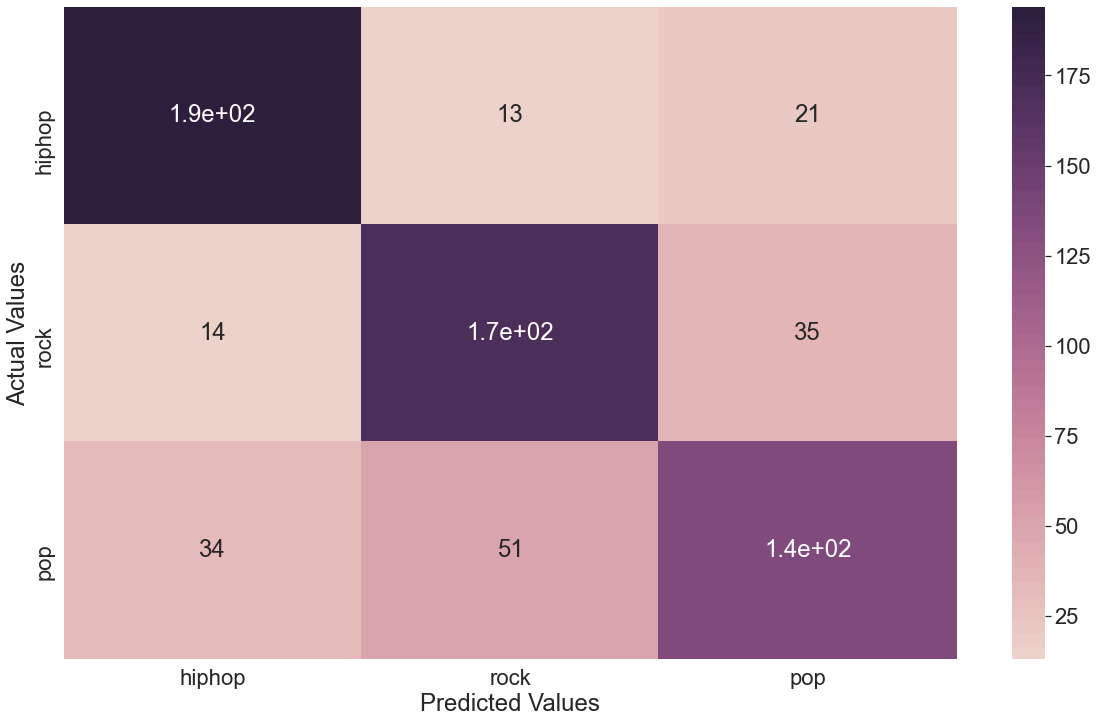

In [32]:
# create a heatmap for the confusion matrix for display
pyplot.figure(figsize= (20,12))
seaborn.set(font_scale = 2);
ax = seaborn.heatmap(confusion_df, annot=True, cmap=seaborn.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [29]:
def train_final_model(X, y):
    clf = KerasClassifier(
        build_fn=set_shape_create_cnn_model('cnn', ncols)
    )
    
    pipe = Pipeline([
        ('norm_pipe', norm_pipe),
        ('clf', clf)
    ])

    pipe = pipe.set_params(**params)
    
    y = to_categorical(y, 3)
    
    return pipe.fit(X, y, clf__batch_size=20,
                    clf__epochs=75, 
                    clf__validation_split=.4,
                    clf__callbacks=[
                        tensorboard_cb, 
#                         early_stopping_cb
                    ])

In [30]:
final_model = train_final_model(X, y)

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 358, 32)           128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 179, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 177, 64)           6208      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 88, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 86, 96)            18528     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 43, 96)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4128)              0       

101/101 [==============================] - 3s 28ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1003 - val_accuracy: 0.3146
Epoch 45/75
101/101 [==============================] - 3s 29ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1003 - val_accuracy: 0.3146
Epoch 46/75
101/101 [==============================] - 3s 31ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1003 - val_accuracy: 0.3146
Epoch 47/75
101/101 [==============================] - 3s 29ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1003 - val_accuracy: 0.3146
Epoch 48/75
101/101 [==============================] - 2s 25ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1004 - val_accuracy: 0.3146
Epoch 49/75
101/101 [==============================] - 2s 22ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1003 - val_accuracy: 0.3146
Epoch 50/75
101/101 [==============================] - 4s 39ms/step - loss: 1.0983 - accuracy: 0.3392 - val_loss: 1.1004 - val_accuracy: 0.3146
Epoc

In [22]:
norm_pipe = final_model.named_steps['norm_pipe']
clf = final_model.named_steps['clf']

In [23]:
# save pipeline estimator to disk
norm_pipe_path = MOUNTED_DATASET_PATH + '/model/pipeline_estimator_2.pkl'
joblib.dump(norm_pipe, open(norm_pipe_path, 'wb'))

In [24]:
#  save keras model to disk
model_path = MOUNTED_DATASET_PATH + '/model/cnn_model_2.h5'
clf.model.save(model_path)